In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits

In [6]:
data_path = "/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/"
subhalos  = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]

Nsubhalos = len(subhalos)
rs      = np.empty([Nsubhalos])    # True scale radius in arcsec
rs_err  = np.empty([Nsubhalos,2])  # 1\sigma error
Reff  = np.empty([Nsubhalos]) # Effective radius
Tstar = np.empty([Nsubhalos]) # log10 "True" stellar mass

In [7]:
for i, s in enumerate(subhalos):
    ## Reading the data
    with open("{}/TNG50-1-snap84-subhalo{}/dm/dm_nonlinear_rst.json".format(data_path,s)) as f:
        DM = json.load(f)
        f.close()
    
    rs[i]     = DM["r_s"][1]
    rs_err[i] = np.diff(DM["r_s"])
    
    
    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
            dyLens_shear = json.load(f)
            f.close()

    Reff[i]  = dyLens_shear["MthetaE"]
    Tstar[i] = dyLens_shear["Mstar"]

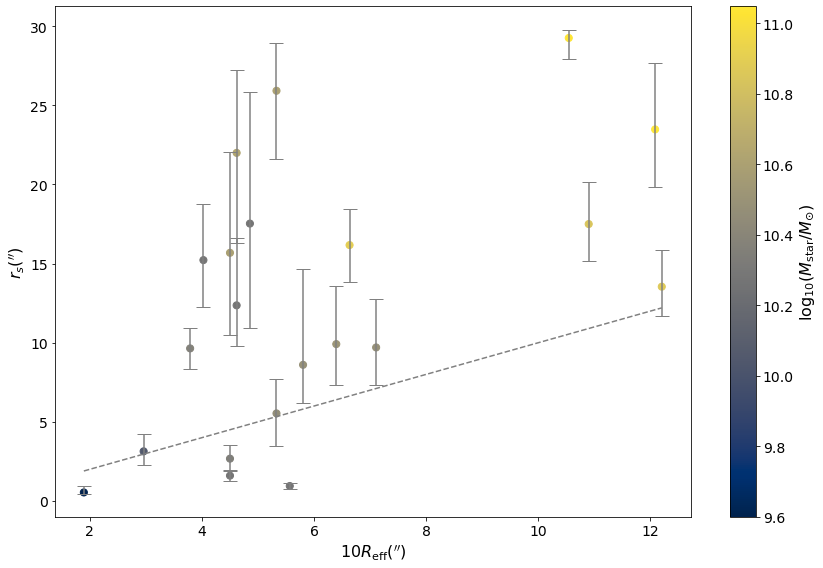

In [22]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Criar a figura com subplots
fig = plt.figure(figsize=(12, 8))

plt.scatter(x=10*Reff, y=rs, s=50, c=Tstar, cmap="cividis")


plt.errorbar(x=10*Reff, y=rs, yerr=abs(rs_err.T),
                      ls="None", color="gray", capsize=7)

cbar = plt.colorbar()
cbar.set_label(r"${\log_{10}(M_{\rm star}/M_{\odot})}$", fontsize=16) 


plt.xlabel(r"$10R_{\rm eff} ('')$",  size=16)
plt.ylabel(r"$r_s ('')$",  size=16)
r_line = 10*Reff
r = np.linspace(r_line.min(), r_line.max())
plt.plot(r, r, color="gray", linestyle="--")

plt.tight_layout()


----